In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## read results from the file

In this notebook, we will do ablation study about MF-RBF-Kriging model.


In [2]:
# read results for mf-rbf-kriging
mf_rbf_kriging_input = pd.read_csv(
    "../mf_rbf_kriging/exp_mf_rbf_input.csv", index_col=0
)
mf_rbf_kriging_output = pd.read_csv(
    "../mf_rbf_kriging/exp_mf_rbf_output.csv", index_col=0
)
# merge input and output
mf_rbf_kriging_results = pd.merge(
    mf_rbf_kriging_input, mf_rbf_kriging_output, left_index=True, right_index=True
)
# make normalized_mae and normalized_rmse to be absolute value
mf_rbf_kriging_results["normalized_mae"] = mf_rbf_kriging_results[
    "normalized_mae"
].abs()
mf_rbf_kriging_results["normalized_rmse"] = mf_rbf_kriging_results[
    "normalized_rmse"
].abs()


# load kriging results
kriging_input = pd.read_csv("../kriging/exp_kriging_input.csv", index_col=0)
kriging_output = pd.read_csv("../kriging/exp_kriging_output.csv", index_col=0)
# merge input and output
kriging_results = pd.merge(
    kriging_input, kriging_output, left_index=True, right_index=True
)
# make normalized_mae and normalized_rmse to be absolute value
kriging_results["normalized_mae"] = kriging_results["normalized_mae"].abs()
kriging_results["normalized_rmse"] = kriging_results["normalized_rmse"].abs()
# remove results of "Forrestor_1a"
kriging_results = kriging_results[kriging_results["problem"] != "Forrester_1a"]

In [3]:
mf_rbf_kriging_results.problem.unique()

array(['mf_Bohachevsky', 'mf_Booth', 'mf_Borehole', 'mf_CurrinExp',
       'mf_Hartman3', 'mf_Hartman6', 'mf_Himmelblau', 'mf_Park91A',
       'mf_Park91B', 'mf_Sixhump'], dtype=object)

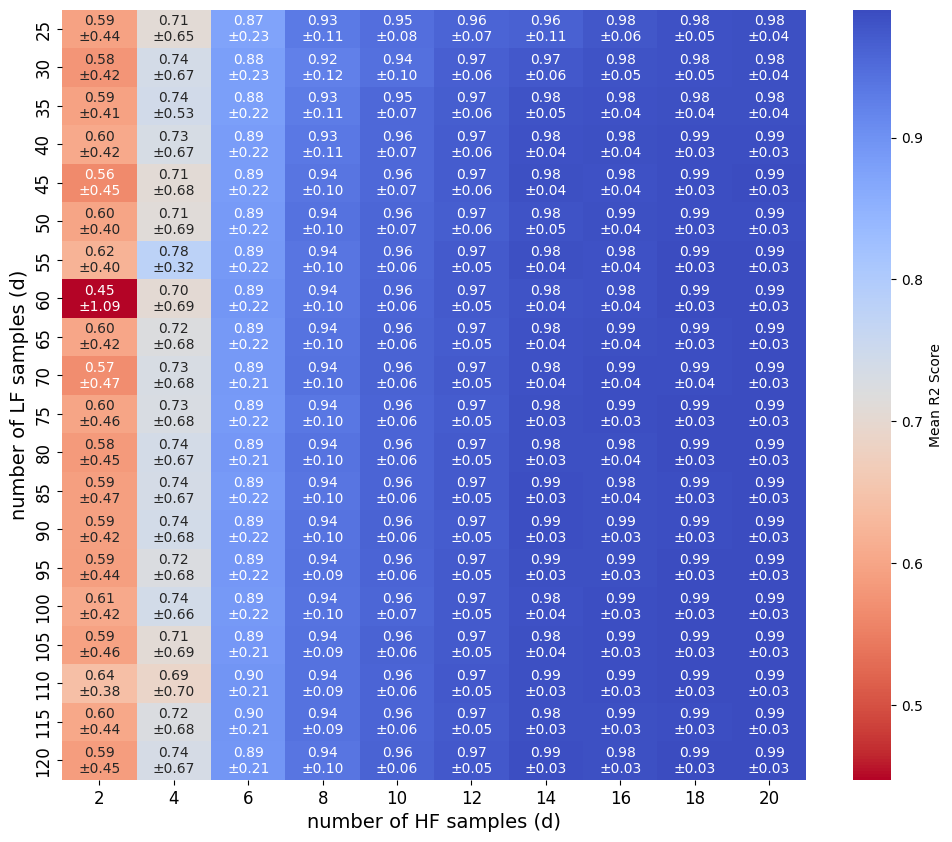

In [6]:
# Create a pivot table for num_lf, num_hf, mean, and std of r2
pivot_table = mf_rbf_kriging_results.pivot_table(
    values="r2", index="num_lf", columns="num_hf", aggfunc=["mean", "std"]
)

# Create a custom annotation array with both mean and std values
annotations_mean = pivot_table["mean"].applymap(
    "{:.2f}".format).astype(str).values
annotations_std = "±" + \
    pivot_table["std"].applymap("{:.2f}".format).astype(str).values

# Combine annotations
annotations_combined = [
    f"{m}\n{s}" for m, s in zip(annotations_mean.flatten(), annotations_std.flatten())
]
annotations_combined = np.array(
    annotations_combined).reshape(annotations_mean.shape)

# Create a combined heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(
    pivot_table["mean"],
    annot=annotations_combined,
    fmt="",
    cmap="coolwarm_r",
    cbar_kws={"label": "Mean R2 Score"},
)
# plt.title("R2 Score of MF-RBF-Kriging with different number of samples")
plt.xlabel("number of HF samples (d)", fontsize=14)
plt.ylabel("number of LF samples (d)", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig("mf_rbf_kriging_r2_score.png", dpi=300, bbox_inches="tight")
plt.savefig("mf_rbf_kriging_r2_score.pdf", dpi=300, bbox_inches="tight")
plt.savefig("mf_rbf_kriging_r2_score.svg", dpi=300, bbox_inches="tight")
plt.show()

In [15]:
# select mf_Hartman3 function
mf_rbf_kriging_results_hartman3 = mf_rbf_kriging_results[
    mf_rbf_kriging_results["problem"] == "mf_Sixhump"
]
kriging_results_hartman3 = kriging_results[kriging_results["problem"] == "mf_Sixhump"]

kriging_results_hartman3

,num_sample,problem,seed,progress,normalized_mae,normalized_rmse,r2,cpu_time
900,2,mf_Sixhump,1,finished,4.455488,1.653914,-0.392294,0.217690
901,4,mf_Sixhump,1,finished,1.451350,0.374897,0.928463,0.216379
902,6,mf_Sixhump,1,finished,1.753833,0.328003,0.945240,0.404464
903,8,mf_Sixhump,1,finished,0.831588,0.224588,0.974327,0.475010
904,10,mf_Sixhump,1,finished,1.909764,0.377878,0.927321,0.482160
...,...,...,...,...,...,...,...,...
995,32,mf_Sixhump,5,finished,0.070866,0.008277,0.999963,3.342262
996,34,mf_Sixhump,5,finished,0.086958,0.011152,0.999934,3.646148
997,36,mf_Sixhump,5,finished,0.019742,0.003401,0.999994,3.544140
998,38,mf_Sixhump,5,finished,0.087284,0.007009,0.999974,4.494225


In [19]:
# find out the case with 100d lf samples and 10d hf samples
aa = mf_rbf_kriging_results_hartman3[
    (mf_rbf_kriging_results_hartman3["num_lf"] == 40)
    & (mf_rbf_kriging_results_hartman3["num_hf"] == 10)
]
aa

,method,num_hf,num_lf,problem,seed,progress,normalized_mae,normalized_rmse,r2,cpu_time
9034,mf_rbf,10,40,mf_Sixhump,1,finished,1.138272,0.219763,0.975418,0.906770
9234,mf_rbf,10,40,mf_Sixhump,2,finished,0.504928,0.175625,0.983773,0.926665
9434,mf_rbf,10,40,mf_Sixhump,3,finished,0.623469,0.123964,0.991714,1.176515
9634,mf_rbf,10,40,mf_Sixhump,4,finished,0.386879,0.062054,0.997984,0.840989
9834,mf_rbf,10,40,mf_Sixhump,5,finished,0.161106,0.029888,0.999524,0.863517


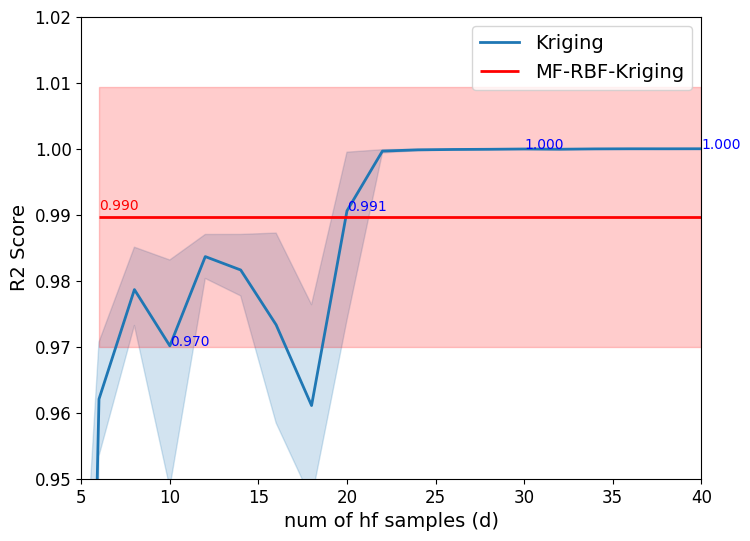

In [20]:
# plot accuracy of kriging with different number of samples
fig, ax = plt.subplots(figsize=(8, 6))
sns.lineplot(
    x="num_sample",
    y="r2",
    data=kriging_results_hartman3,
    label="Kriging",
    linewidth=2,
)

# plot results of mf-rbf-kriging
plt.hlines(
    y=aa["r2"].mean(),
    xmin=6,
    xmax=40,
    label="MF-RBF-Kriging",
    colors="red",
    linewidth=2,
)
plt.text(6, aa["r2"].mean() + 0.001, f"{aa['r2'].mean():.3f}", color="red")
# Calculate the average "r2" value for each num_sample
average_r2_per_sample = kriging_results_hartman3.groupby("num_sample")[
    "r2"].mean()
# Annotate each point with the average "r2" value
for i, (num_sample, average_r2) in enumerate(average_r2_per_sample.items()):
    if (i + 1) % 5 == 0:  # Show every 2nd iteration
        plt.text(num_sample, average_r2, f"{average_r2:.3f}", color="blue")


plt.fill_between(
    x=[6, 40],
    y1=aa["r2"].mean() - 1.95 * aa["r2"].std(),
    y2=aa["r2"].mean() + 1.95 * aa["r2"].std(),
    color="red",
    alpha=0.2,
)
plt.xlabel("num of hf samples (d)", fontsize=14)
plt.ylabel("R2 Score", fontsize=14)
ax.set_xlim(5, 40)
ax.set_ylim(0.95, 1.02)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=14)
plt.show()

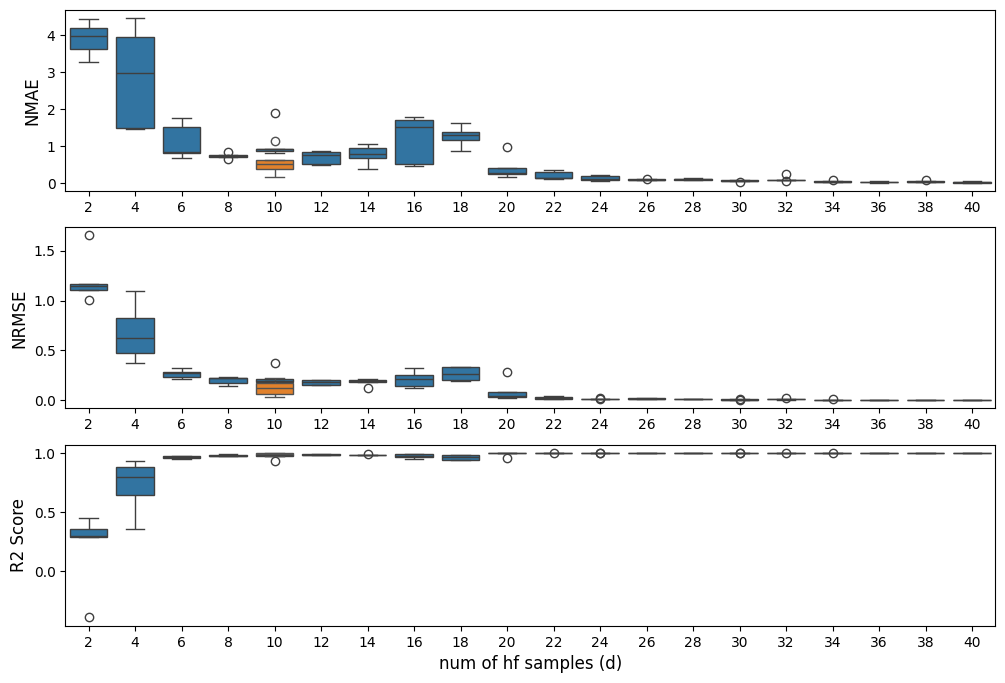

In [43]:
# same plots for normalized_mae and normalized_rmse and r2
fig, ax = plt.subplots(3, 1, figsize=(12, 8))
sns.boxplot(
    x="num_sample",
    y="normalized_mae",
    data=kriging_results_hartman3,
    ax=ax[0],
)
# # plot results of mf-rbf-kriging
sns.boxplot(
    x="num_hf",
    y="normalized_mae",
    data=aa,
    ax=ax[0],
)
# plot settings
ax[0].set_ylabel("NMAE", fontsize=12)
ax[0].set_xlabel("")
# plot normalized_rmse
sns.boxplot(
    x="num_sample",
    y="normalized_rmse",
    data=kriging_results_hartman3,
    ax=ax[1],
)
# # plot results of mf-rbf-kriging
sns.boxplot(
    x="num_hf",
    y="normalized_rmse",
    data=aa,
    ax=ax[1],
)
# plot settings
ax[1].set_ylabel("NRMSE", fontsize=12)
ax[1].set_xlabel("")

# plot r2
sns.boxplot(
    x="num_sample",
    y="r2",
    data=kriging_results_hartman3,
    ax=ax[2],
)
# # plot results of mf-rbf-kriging
sns.boxplot(
    x="num_hf",
    y="r2",
    data=aa,
    ax=ax[2],
)
# plot settings
ax[2].set_ylabel("R2 Score", fontsize=12)
ax[2].set_xlabel("number of HF samples (d)", fontsize=12)


plt.savefig("mf_rbf_kriging_six_hump_accuracy.png",
            dpi=300, bbox_inches="tight")
plt.savefig("mf_rbf_kriging_six_hump_accuracy.pdf",
            dpi=300, bbox_inches="tight")
plt.savefig("mf_rbf_kriging_six_hump_accuracy.svg",
            dpi=300, bbox_inches="tight")
plt.show()